# Lecture 5: Introduction to Probability Theory (Part III)

## Objectives

+ To introduce continuous random variables.
+ To introduce the cumulative distribution function and its properties.
+ To introduce the probability density function and its properties.
+ To introduce the expectation of continuous random variables.
+ To introduce the concept of the joint probability density function.
+ To present some simple analytical examples Bayesian inference.

## Readings

+ These notes.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import numpy as np

## Something more on probability spaces

It turns out that when $\Omega$ is a continuous space, like $\mathbb{R}$ for example, it is not possible to take $\mathcal{F}$ to be all the subsets of $\Omega$ (you need to take a measure-theoretic probability theory class to understand why this is).
However, many "nice" subsets of $\Omega$ are usually in $\mathcal{F}$.
For example, in the case of $\Omega=\mathbb{R}$, $\mathcal{F}$ can include all intervals, and any countable unions and intersections of intervals.
That's a lot of sets.

In any case, $\mathcal{F}$ must satisfy certain properties for everything to be well-defined.
These properties are:
+ $\Omega \in \mathcal{F}$
+ For any $A$ in $\mathcal{F}$, the complement $A^c$ is in $\mathcal{F}$.
+ For any $A_1,A_2,\dots$ in $\mathcal{F}$, the union $\cup_n A_n$ is in $\mathcal{F}$.
When a set of subsets $\mathcal{F}$ satisfies these properties, we say that it forms a $\sigma$-algebra.

## Continuous random variables

Consider a probability space $(\Omega, \mathcal{F}, \mathbb{P})$.
A continuous random variable models the result of an experiment that can potentially take infinitely many values.
That is, it is a function
$$
X:\Omega \rightarrow \mathbb{R}.
$$

## The cumulative distribution function

Let $X$ be a continuous random variable.
Its cumulative distribution function (CDF) $F_X(x)$ gives the probability that $X$ is smaller than $x$:
$$
F_X(x) := \mathbb{P}(X\le x) = \mathbb{P}\left(\left\{\omega: X(\omega) \le x\right\}\right).
$$

### Properties of the cumulative distribution function

+ $F_X(x)$ is an increasing function.
+ $F_X(-\infty) = 0$.
+ $F_X(+\infty) = 1$.
+ $\mathbb{P}(a\le X \le b) = F_X(b) - F_X(a)$.

## The probability density function

The probability density function (PDF) is a "function" $f_X(x)$ that can give us the probability that $X$ is in any "good" subset $A$ of $\mathbb{R}$ as follows:
$$
\mathbb{P}(X\in A) = \int_A f_X(x) dx.
$$
Note that certain random variables may not have a PDF that is a function.
That's why I put the word "function" in quotes.
However, if you allow the PDF to include Dirac's $\delta$, then any random variable has a PDF.
We will ignore this complication for the moment.

In this class, we will simplify the notation and we will be writing:
$$
p(x) \equiv f_X(x),
$$
when there is no ambiguity.

### Properties of the probability density function
+ $p(x) \ge 0$ for all $x$.
+ $\int_{-\infty}^{\infty} p(x) dx = 1$.
+ The derivative of the CDF is the PDF, i.e., $F_X'(x) = p(x)$.

### Dirac's delta and a unified view of all random variables

Dirac's $\delta$ is a special function, actually called a distribution, which is defined as follows:
$$
\delta(x) = 0,
$$
for $x\not=0$, and
$$
\int_{-\infty}^\infty \delta(x) dx = 0
$$
You can think of Dirac's $\delta$ as the PDF of a discrete random variable that takes the value $0$ with probability one.

Using Dirac's $\delta$ you can make any discrete random variable you want look like a continuous random variable.
For example, consider a Categorical random variable taking values $x_1,\dots,x_K$ with probabilities $p_1,\dots,p_K$.
The PDF of this random variable can be written as:
$$
p(x) = \sum_{k=1}^Kp_k\delta(x - x_k).
$$

The most general random variable one can think of has a PDF that consists of two parts:
$$
p(x) = f^n_X(x) + f^{\delta}_X(x),
$$
a part $f^n_X(x)$ that is a nice proper function and a part $f^{\delta}_X(x)$ that consists of a weighted sum of Dirac $\delta$'s. 

## Expectations of continuous random variables

The expectation of a continuous random variable is:
$$
\mathbb{E}[X] = \int_{-\infty}^\infty x p(x)dx.
$$
Its properties are the same as the expectation of a discrete random variable.

The expectation of a function of the random variable is:
$$
\mathbb{E}[f(X)] = \int_{-\infty}^\infty f(x)p(x)dx.
$$

In general, using the Dirac $\delta$ trick we introduced above, there is no need to differentiate between integrations and summations.
We can use integration for both continuous and discrete random variables.

## Example: The uniform distribution

The uniform distribution is the most common continuous distribution.
It corresponds to a random variable that is equally likely to take a value within a given interval.
We write:
$$
X\sim U([0,1]),
$$
and we read $X$ follows a uniform distribution taking values in $[0,1]$.

The probability density of the uniform is constant in $[0,1]$ and zero outside it.
We have:
$$
p(x) := U(x|[0,1]) := f_X(x) = \begin{cases}
1,&\;0\le x \le 1,\\
0,&\;\text{otherwise}.
\end{cases}
$$

The cumulative distribution funciton of the uniform is:
$$
F_X(x) = \mathbb{P}(X \le x) = \int_0^x f_X(u) du = \int_0^x du = x.
$$

$$
\mathbb{P}(a \le X \le b) = F_X(b) - F_X(a) = b - a.
$$

The expectation of the uniform is:
$$
\mathbb{E}[X] = \int_0^1 xdx = \frac{1}{2}.
$$

The variance of the uniform is:
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \left(\mathbb{E}[X]\right)^2 = \frac{1}{3} - \frac{1}{4} = \frac{1}{12}.
$$

In [2]:
# Let's demonstrate how you can sample from the uniform
import scipy.stats as st
X = st.uniform()
X.rvs(size=100)

array([0.97837346, 0.625879  , 0.52290077, 0.51240399, 0.04980333,
       0.59070721, 0.99822886, 0.88110047, 0.77926415, 0.80169289,
       0.63377297, 0.4330944 , 0.39263228, 0.87655016, 0.71793991,
       0.96914239, 0.98791565, 0.03918648, 0.24459545, 0.32064884,
       0.07865616, 0.6215369 , 0.44383284, 0.98624492, 0.23687563,
       0.76983114, 0.76920715, 0.12850447, 0.5412241 , 0.54202371,
       0.56063597, 0.46389922, 0.41674185, 0.03591847, 0.09757618,
       0.15020877, 0.62910003, 0.95689217, 0.59937696, 0.03754368,
       0.45902144, 0.18677698, 0.91152939, 0.84733429, 0.57136117,
       0.38750976, 0.75984272, 0.82609542, 0.95836646, 0.86262593,
       0.71400927, 0.35642015, 0.20075114, 0.23625662, 0.50861275,
       0.92449095, 0.59173485, 0.21624696, 0.23393397, 0.76204738,
       0.10804259, 0.27232046, 0.51790518, 0.96678481, 0.43760293,
       0.56561303, 0.95582303, 0.75536118, 0.40260221, 0.83693531,
       0.78007319, 0.28611426, 0.64475304, 0.70836801, 0.23042

In [3]:
# An alternative way is to use the functionality of numpy
np.random.rand(100)

array([0.70121505, 0.91085994, 0.69158752, 0.11946638, 0.09728609,
       0.49065546, 0.27969302, 0.21582279, 0.93441454, 0.41349678,
       0.47870551, 0.73636654, 0.13051002, 0.37208425, 0.3116429 ,
       0.82258973, 0.23919661, 0.22838676, 0.5542224 , 0.53016444,
       0.35530159, 0.09605987, 0.5549514 , 0.60081403, 0.73167165,
       0.78542101, 0.32674251, 0.03529146, 0.59239157, 0.90631834,
       0.61845217, 0.60454155, 0.17810513, 0.62028272, 0.15576036,
       0.65303787, 0.7683246 , 0.49567772, 0.54411001, 0.22508122,
       0.84317487, 0.8576526 , 0.66822961, 0.41742108, 0.00306515,
       0.87628444, 0.02520404, 0.98943986, 0.00223345, 0.17440434,
       0.52514865, 0.00128126, 0.92851971, 0.00146251, 0.49170257,
       0.75837021, 0.88191865, 0.29204905, 0.20065024, 0.07695563,
       0.1160243 , 0.55381338, 0.82336444, 0.0619979 , 0.49091839,
       0.27736099, 0.35720052, 0.12455454, 0.39670171, 0.98057418,
       0.65956781, 0.22232854, 0.44287494, 0.4036119 , 0.69792

### Questions

+ Modify the code above so that you sample from a uniform distribution taking values in $[2, 5]$?

## Joint probability density function

Let $X$ and $Y$ be two random variables.
There joint probability density $f_{X,Y}(x,y)$ is the function that can give us the probability that the pair $(X,Y)$ belongs to any "good" subset $A$ of $\mathbb{R}^2$ as follows:
$$
\mathbb{P}\left((X,Y)\in A\right) = \int\int_{A} f_{X,Y}(x,y)dxdy.
$$
Of course, we will be writing:
$$
p(x,y) := f_{X,Y}(x,y),
$$
when there is no ambiguity.

If you integrate one of the variables out of the joint, you get the PDF of the other variable.
For example:
$$
p(x) = \int_{-\infty}^\infty p(x,y) dy,
$$
and
$$
p(y) = \int_{-\infty}^\infty p(x, y) dx.
$$

For many random variables $X_1,\dots,X_N$ their joint PDF $p(x_1,\dot,x_N)$ is similarly defined.
Again, integrating out some variables gives the pdf of the others.

## Conditioning a random variable on another

Consider two random variables $X$ and $Y$.
If we had observed that $Y=y$, how would this change the PDF of $X$?
The answer is given via Bayes' rule.
The PDF of $X$ conditioned on $Y=y$ is:
$$
p(x|y) = \frac{p(x,y)}{p(y)}.
$$

## Example: Inferring the probability of a coin toss from data (1/3)

This is our first Bayesian inference example!

Let's say that we run a coin toss experiment $N$ times and we wish to figure out the probability of heads.
We will bring into the picture all the mathematical machinery we have introduced so far.
Let's say that the data we have observe are $x_1,\dots,x_N$.
For notational convenience we will be writing:
$$
x_{1:N} := (x_1,\dots,x_N).
$$

First, let's start with the probability of success of the coin toss.
Let's call it $\theta$.
How can we describe our uncertainty about it?
We have to assign a *prior* probability distribution on it.
Let's say that we don't know anything about it except that it must be between 0 and 1.
What distribution should we assign?
Of course, a uniform distribution:
$$
\theta \sim U([0,1]).
$$
Second, each coin toss experiment corresponds to an independent Bernoulli variable with the same probability of success $\theta$.
We write:
$$
X_n | \theta \sim \operatorname{Bernoulli}(\theta),
$$
for $n=1,\dots,N$.
Note that these random variables depend on $\theta$.
That's why we are conditioning like this.

Before proceeding with the mathematics, let's draw the graph.

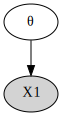

In [4]:
# First for one coin toss
from graphviz import Digraph
gc = Digraph('coin_toss_bayes_1')
gc.node('theta', label='<&theta;>')
gc.node('X1', label='<X<sub>1</sub>>', style='filled')
gc.edge('theta', 'X1')
gc.render('coin_toss_bayes_1', format='png')
gc

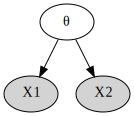

In [5]:
# Now for two coin tosses
gc2 = Digraph('coin_toss_bayes_2')
gc2.node('theta', label='<&theta;>')
gc2.node('X1', label='<X<sub>1</sub>>', style='filled')
gc2.node('X2', label='<X<sub>2</sub>>', style='filled')
gc2.edge('theta', 'X1')
gc2.edge('theta', 'X2')
gc2.render('coin_toss_bayes_2', format='png')
gc2

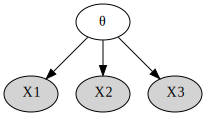

In [6]:
# Now for three coin tosses
gc3 = Digraph('coin_toss_bayes_3')
gc3.node('theta', label='<&theta;>')
gc3.node('X1', label='<X<sub>1</sub>>', style='filled')
gc3.node('X2', label='<X<sub>2</sub>>', style='filled')
gc3.node('X3', label='<X<sub>3</sub>>', style='filled')
gc3.edge('theta', 'X1')
gc3.edge('theta', 'X2')
gc3.edge('theta', 'X3')
gc3.render('coin_toss_bayes_3', format='png')
gc3

Because this notation gets a little bit too involved, we introduce the so called [plate notation](https://en.wikipedia.org/wiki/Plate_notation).
Whategver is inside the subgrpah indicated by the box is supposed to be repeated as many times as indicated:

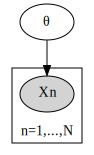

In [7]:
gcp = Digraph('coin_toss_bayes_plate')
gcp.node('theta', label='<&theta;>')
with gcp.subgraph(name='cluster_0') as sg:
    sg.node('Xn', label='<X<sub>n</sub>>', style='filled')
    sg.attr(label='n=1,...,N')
    sg.attr(labelloc='b')
gcp.edge('theta', 'Xn')
gcp.render('coin_toss_bayes_plate', format='png')
gcp

To carry out Bayesian inference, we need the joint probability density of all variables.
It is:
$$
p(x_1,\dots,x_N, \theta) = p(x_{1:N}|\theta) p(\theta) = \left(\prod_{n=1}p(x_n|\theta)\right)p(\theta),
$$
where we first used Bayes' rule and then the fact that the coin tosses are independent.
We must find the mathematical form of all these expressions.
For $\theta$, we simply have:
$$
p(\theta) = 1_{[0,1]}(\theta),
$$
where $1_A(x)$ is the indicator function of $A$, i.e., $1_A(x) = 1$ if $x$ is in $A$ and zero otherwise.
For the Bernoulli pmf's we have:
$$
p(X_n = 1|\theta) = \theta,
$$
and
$$
p(X_n = 0|\theta) = 1- \theta.
$$
So, in a unified way, we can write:
$$
p(x_n | \theta) = \theta^{x_n}(1-\theta)^{1-x_n}.
$$
Now, let's re-write the joint pmf:
$$
p(x_1,\dots,x_N, \theta) = \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^Nx_n}1_{[0,1]}(\theta),
$$
which has a nice interpretation as it depends only on the total number of heads $\sum_{n=1}^Nx_n$.

Now, we are in a position to apply Bayes rule to condition on the data.
We have:
$$
p(\theta|x_{1:N}) = \frac{p(x_{1:N},\theta)}{p(x_{1:N})} \propto p(x_{1:N}, \theta) = \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^Nx_n}1_{[0,1]}(\theta).
$$
It may be the first time you encounter this, but we have actually discovered a new distribution called the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution).
This is what the posterior turns out to be.
This is one of the few instances where the posterior is analytically available.
We will return to the example, once we introduce the Beta distribution.

## Example: The Beta distribution

The Beta distribution is suitable for random variables that take values in $[0,1]$ but are not necessarily uniform.
We write:
$$
X\sim \operatorname{Beta}(\alpha, \beta),
$$
where $\alpha$ and $\beta$ are positive shape parameters.
The interpretation of the parameters is more or less this:
+ The bigger $\alpha$ is, the more the distribution is pulled towards zero.
+ The bigger $\beta$ is, the more the distribution is pulled towards one.

The PDF of the Beta is:
$$
p(x) = \frac{x^{\alpha-1}(1-x)^{\beta - 1}}{B(\alpha,\beta)},
$$
where
$$
B(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)},
$$
where $\Gamma$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function).
It's expectation is:
$$
\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}.
$$

## Example: Inferring the probability of a coin toss from data (2/2)

Now, that we know about the Beta distribution, we can write for the posterior of $\theta$:
$$
p(\theta|x_{1:N}) = \operatorname{Beta}\left(\theta\middle|1 + \sum_{n=1}^Nx_n, 1 + N - \sum_{n=1}^Nx_n\right).
$$
where with $\operatorname{Beta}(\theta|\alpha,\beta)$ we mean the PDF of the $\operatorname{Beta}(\alpha,\beta)$ evaluated at $\theta$ (this is a very useful notation).
So, we see that the $\alpha$ parameter is just one plus the number of heads and the $\beta$ parameter is one plus the number of tails.

Let's try this out with some fake data.

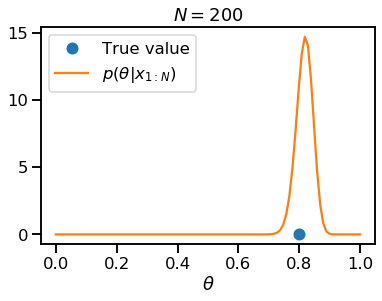

In [8]:
# Take a fake coin which is a little bit biased
theta_true = 0.8
# This is the random variable corresponding to a coin toss
X = st.bernoulli(theta_true)
# Sample from it a number of times to generate our data = (x1, ..., xN)
N = 200
data = X.rvs(size=N)
# Now we are ready to calculate the posterior which the Beta we have above
alpha = 1.0 + data.sum()
beta = 1.0 + N - data.sum()
Theta_post = st.beta(alpha, beta)
# Now we can plot the posterior PDF for theta
fig, ax = plt.subplots()
thetas = np.linspace(0, 1, 100)
ax.plot([theta_true], [0.0], 'o', markeredgewidth=2, markersize=10, label='True value')
ax.plot(thetas, Theta_post.pdf(thetas), label=r'$p(\theta|x_{1:N})$')
ax.set_xlabel(r'$\theta$')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best')

### Questions

+ Experiment with different values of $\theta_{\text{true}}$ and different values of $N$.
+ Is the true value always covered by the posterior PDF?